# Importing libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Reshape
#from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image
from tensorflow.keras.utils import load_img,img_to_array
import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

## Reading the resized images

In [16]:
file = open('img_x_train.pkl','rb')

resized_img_Xtrain = pickle.load(file)

file.close()
file = open('img_y_train.pkl','rb')

resized_img_Ytrain = pickle.load(file)

file.close()
file = open('img_x_test.pkl','rb')

resized_img_Xtest = pickle.load(file)

file.close()
file = open('img_y_test.pkl','rb')

resized_img_Ytest = pickle.load(file)

file.close()
file = open('img_x_val.pkl','rb')

resized_img_Xval = pickle.load(file)

file.close()
file = open('img_y_val.pkl','rb')

resized_img_Yval = pickle.load(file)

file.close()

## Normalizing the images


In [17]:
train_x = np.array(resized_img_Ytrain)
train_x = train_x/255.0
test_x = np.array(resized_img_Ytest)
test_x = test_x/255.0
val_x = np.array(resized_img_Yval)
val_x = val_x/255.0
train_x_px = np.array(resized_img_Xtrain)
train_x_px = train_x_px/255.0
test_x_px = np.array(resized_img_Xtest)
test_x_px = test_x_px/255.0
val_x_px = np.array(resized_img_Xval)
val_x_px = val_x_px/255.0

### Convulation encoder Medium risk

In [18]:
Input_img = Input(shape=(80, 80, 3))  
   
#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

# decoding architecture
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same')(x1)

autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')


<center><h2>Autoencoder Architecture <h2></center><img src="download.png" alt="Alternative text" />

In [19]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 80, 80, 256)       7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 128)       295040    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 64)        36928     
                                                             

In [20]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

autoencoder.fit(train_x_px, train_x,
            epochs=50,
            batch_size=128,
            shuffle=True,
            validation_data=(val_x_px, val_x),
            callbacks=[early_stopper]
            )

Epoch 1/50


2023-02-13 16:32:08.168756: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-13 16:32:08.872908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.0310

2023-02-13 16:37:48.740892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 352s 1s/step - loss: 0.0310 - val_loss: 0.0103
Epoch 2/50
235/235 [==============================] - 364s 2s/step - loss: 0.0083 - val_loss: 0.0080
Epoch 3/50
235/235 [==============================] - 361s 2s/step - loss: 0.0070 - val_loss: 0.0075
Epoch 4/50
235/235 [==============================] - 357s 2s/step - loss: 0.0067 - val_loss: 0.0074
Epoch 5/50
235/235 [==============================] - 352s 2s/step - loss: 0.0060 - val_loss: 0.0064
Epoch 6/50
235/235 [==============================] - 352s 1s/step - loss: 0.0060 - val_loss: 0.0061
Epoch 7/50
235/235 [==============================] - 351s 1s/step - loss: 0.0057 - val_loss: 0.0066
Epoch 8/50
235/235 [==============================] - 357s 2s/step - loss: 0.0056 - val_loss: 0.0060
Epoch 9/50
235/235 [==============================] - 354s 2s/step - loss: 0.0055 - val_loss: 0.0059
Epoch 10/50
235/235 [==============================] - 350s 1s/step - loss: 0.0053 - val_loss: 0.0057


In [6]:
# autoencoder.save('conv_auto.h5')

In [6]:
# from keras.models import load_model
# simple_auto = load_model('conv_auto.h5')

In [9]:
predictions = simple_auto.predict(test_x_px)

 2/94 [..............................] - ETA: 7s 

2023-02-06 19:24:30.305081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 8s 89ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


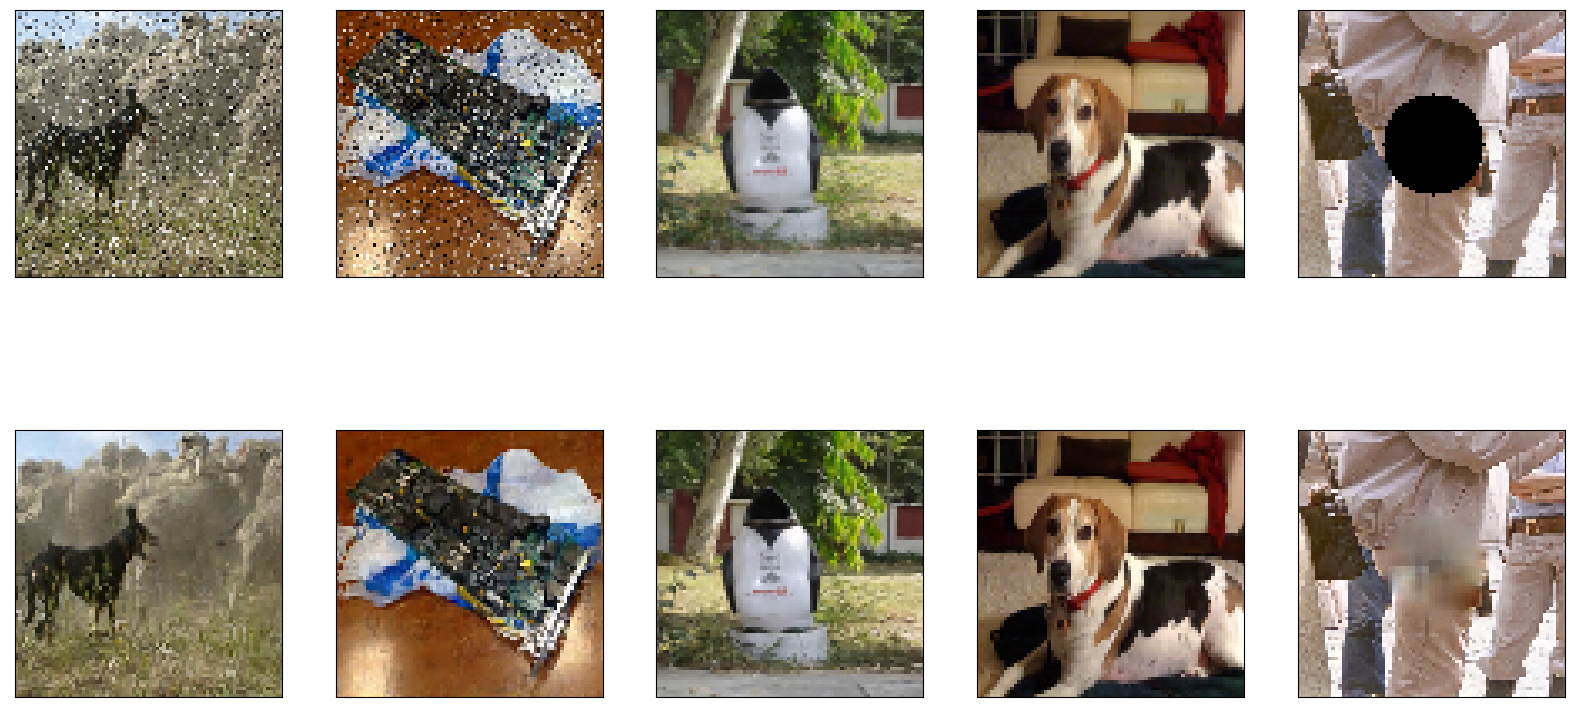

In [10]:
n = 5
plt.figure(figsize= (20,10))
images = [0,15,1899,1738,2001]
j = 0
for i in images:
    
  ax = plt.subplot(2, n, j+1)
  plt.imshow(test_x_px[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, j+1+n)
  plt.imshow(predictions[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
    
  j = j + 1

plt.show()

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import pandas as pd

In [10]:
# con =load_model('conv_auto.h5')

In [23]:
df = pd.DataFrame(autoencoder.history.history)

<AxesSubplot: >

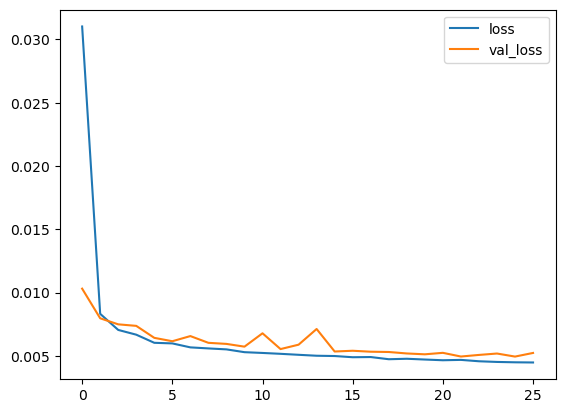

In [24]:
df.plot()